In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from source import config
from source import utils

df_single = pd.read_csv(config.INTERIM_DATA_DIR / 'Enkeltaksler axle load distribution.csv') 
df_boggi = pd.read_csv(config.INTERIM_DATA_DIR / 'Boggiaksler axle load distribution.csv') 
df_triple = pd.read_csv(config.INTERIM_DATA_DIR / 'Trippelaksler axle load distribution.csv') 

2024-12-20 11:35:53.145 | INFO     | source.config:<module>:11 - PROJ_ROOT path is: /home/anders/engasjement_svv


In [2]:
label_x_axis = 'Tonn'
label_y_axis = 'Prosent av den totale fordelingen'
label_legend_individual = 'Prosent av fordelingen'
label_legend_multiple = f'{label_legend_individual}\nfor hver akselkonfigurasjon'
title_multiple = 'Aksellastfordeling for samtlige konfigurasjoner (total, alle lokasjoner)'
loc_legend = 'upper right'

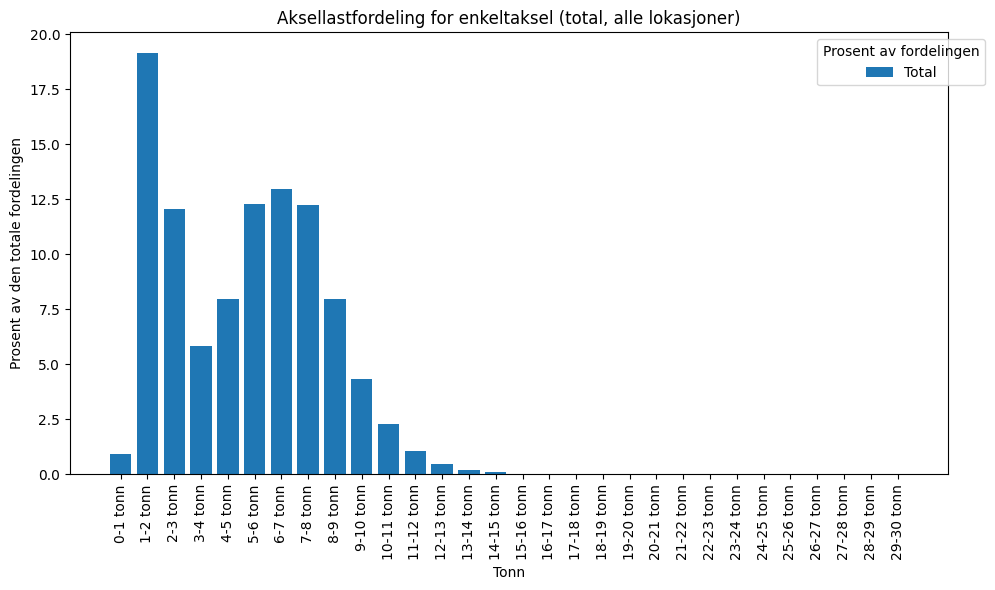

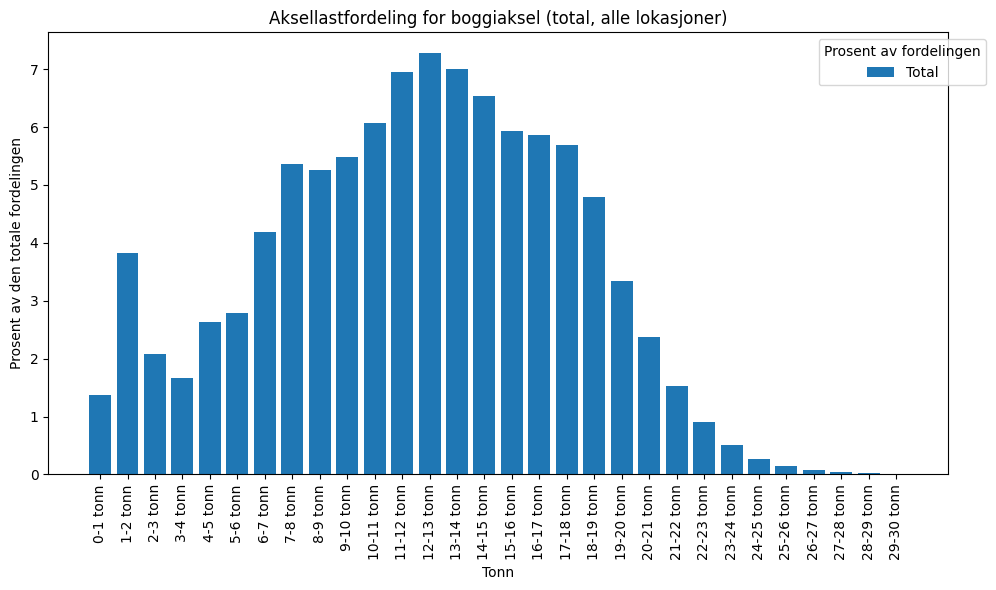

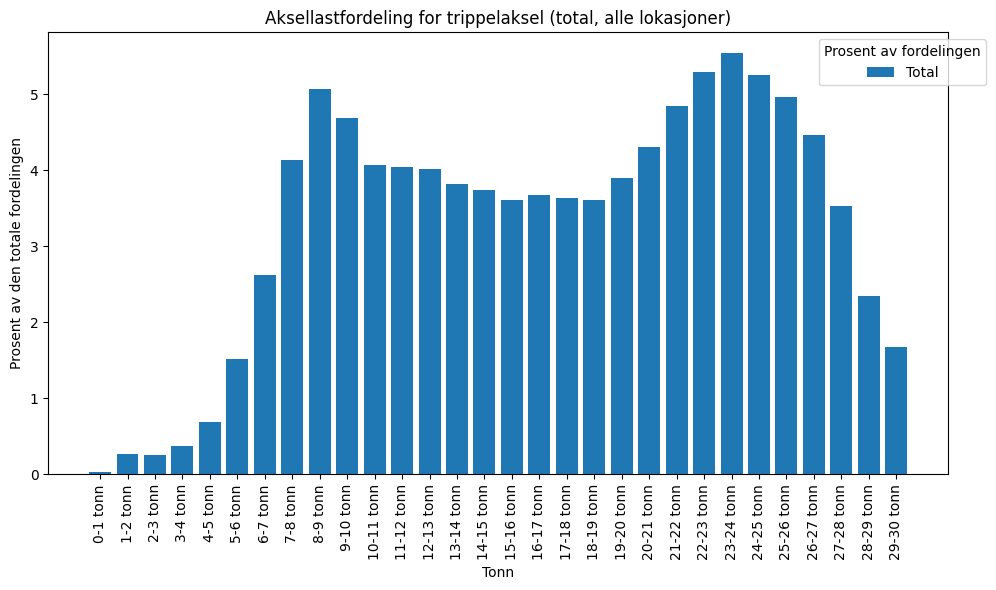

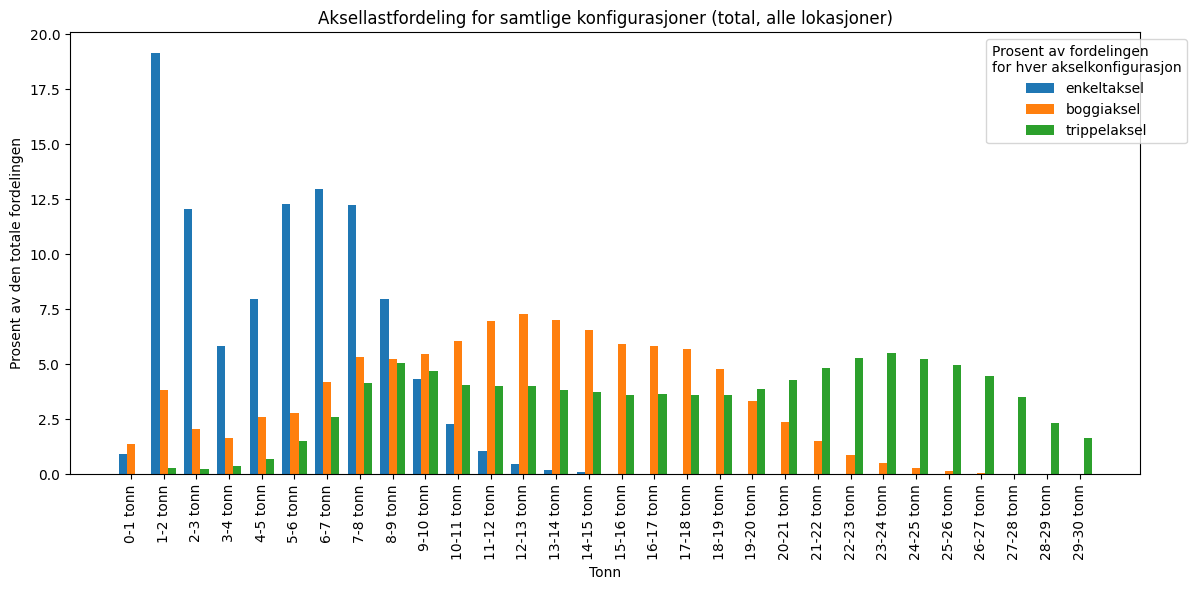

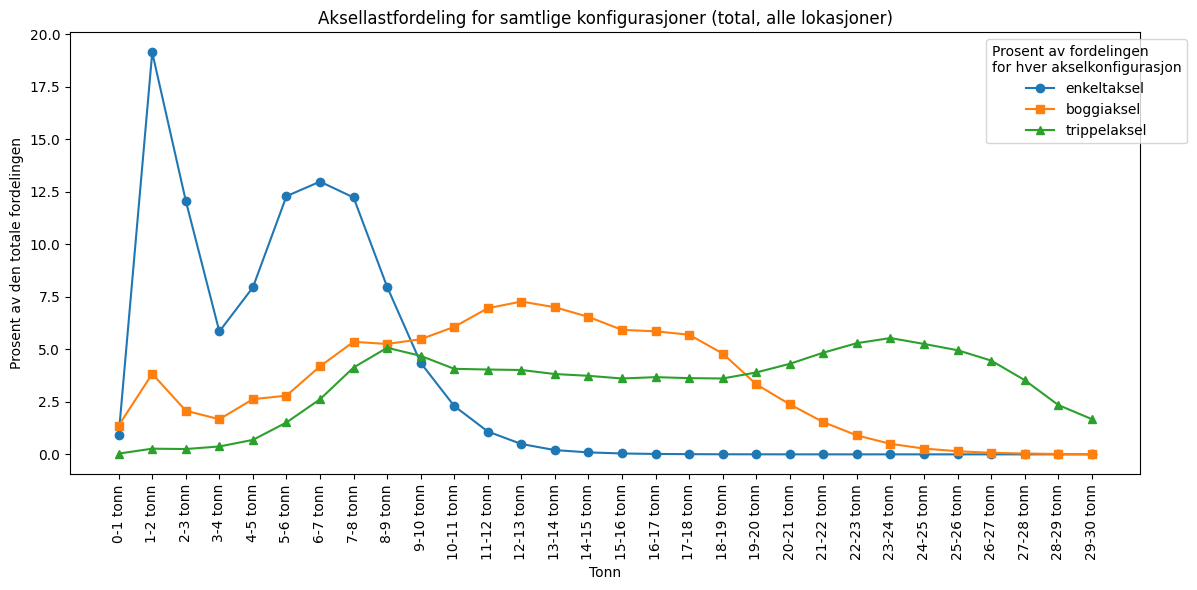

In [3]:
tonnage_categories = df_single.columns[1:]  # Skip the first column which is 'Sted'
df_single_total = df_single[df_single['Sted'] == 'Total'][tonnage_categories].values.flatten()
df_boggi_total = df_boggi[df_boggi['Sted'] == 'Total'][tonnage_categories].values.flatten()
df_triple_total = df_triple[df_triple['Sted'] == 'Total'][tonnage_categories].values.flatten()

def plot_individual_bars(df, axle_type):
    plt.figure(figsize=(10, 6))
    plt.bar(tonnage_categories, df.loc[df['Sted'] == 'Total', tonnage_categories].values.flatten(), label='Total')
    plt.title(f'Aksellastfordeling for {axle_type} (total, alle lokasjoner)')
    plt.xlabel(label_x_axis)
    plt.ylabel(label_y_axis)
    plt.xticks(rotation=90)
    plt.legend(title=label_legend_individual, bbox_to_anchor=(1.05, 1), loc=loc_legend)
    plt.tight_layout()
    plt.show()

def plot_combined_value_bars():
    plt.figure(figsize=(12, 6))
    indices = np.arange(len(tonnage_categories))
    plt.bar(indices - 0.25, df_single_total, width=0.25, label='enkeltaksel')
    plt.bar(indices, df_boggi_total, width=0.25, label='boggiaksel')
    plt.bar(indices + 0.25, df_triple_total, width=0.25, label='trippelaksel')
    plt.title(title_multiple)
    plt.xlabel(label_x_axis)
    plt.ylabel(label_y_axis)
    plt.xticks(indices, tonnage_categories, rotation=90)
    plt.legend(title=label_legend_multiple, bbox_to_anchor=(1.05, 1), loc=loc_legend)
    plt.tight_layout()
    plt.show()

def plot_line_chart():
    plt.figure(figsize=(12, 6))
    plt.plot(tonnage_categories, df_single_total, label='enkeltaksel', marker='o')
    plt.plot(tonnage_categories, df_boggi_total, label='boggiaksel', marker='s')
    plt.plot(tonnage_categories, df_triple_total, label='trippelaksel', marker='^')
    plt.title(title_multiple)
    plt.xlabel(label_x_axis)
    plt.ylabel(label_y_axis)
    plt.xticks(rotation=90)
    plt.legend(title=label_legend_multiple, bbox_to_anchor=(1.05, 1), loc=loc_legend)
    plt.tight_layout()
    plt.show()

plot_individual_bars(df_single, 'enkeltaksel')
plot_individual_bars(df_boggi, 'boggiaksel')
plot_individual_bars(df_triple, 'trippelaksel')
plot_combined_value_bars()
plot_line_chart()